In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
#import afterglowpy as grb

In [19]:
def loadDataFromFile(filename):
    """
    Load GRB afterglow data from a .txt file.
    
    Arguments
    
        filename: the name (and path) to the data file.
        
    Returns
        
        t: array
            observed times in seconds
        nu: array
            observed frequency in Hz
        Fnu: array
            observed flux in mJy
        Ferr: array
            uncertainty in observed flux in mJy
    """
    
    
    t_all, nu_all, Fnu_all, Ferr_all, ul_all = np.loadtxt(filename, usecols=[0,1,2,3,4], unpack=True)
    
    detections = (ul_all == 0.0)
    t_det = t_all[detections]
    nu_det = nu_all[detections]
    Fnu_det = Fnu_all[detections]
    Ferr_det = Ferr_all[detections]
    
    return t_det, nu_det, Fnu_det, Ferr_det
    

In [20]:
#load the data
t, nu, fnu, Ferr = loadDataFromFile("../data/180720B_data.txt")

Text(0, 0.5, 'brightness')

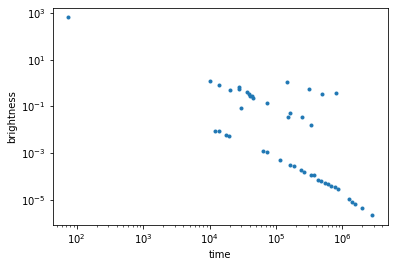

In [27]:
plt.loglog(t, fnu, ls = "",marker = ".")
plt.xlabel("time")
plt.ylabel("brightness")

In [29]:
print(t.shape)
print(nu.shape)
print(fnu.shape)

(46,)
(46,)
(46,)


In [30]:
print(nu)

[1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.55000000e+10 1.55000000e+10 1.55000000e+10
 4.67706708e+14 4.67706708e+14 4.67706708e+14 4.67706708e+14
 4.67706708e+14 4.67706708e+14 4.67706708e+14 4.67706708e+14
 4.67706708e+14 4.67706708e+14 4.67706708e+14 4.67706708e+14
 4.67706708e+14 4.67706708e+14 4.67706708e+14 4.67706708e+14
 4.67706708e+14 1.40000000e+09]


Text(0, 0.5, 'brightness')

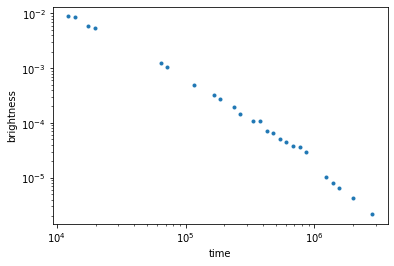

In [33]:
nuX_lo = 10**16
nuX_hi = 10**20
nuX = nu[(nu > nuX_lo) & (nu < nuX_hi)]
tX = t[(nu > nuX_lo) & (nu < nuX_hi)]
fnuX = fnu[(nu > nuX_lo) & (nu < nuX_hi)]
FerrX = Ferr[(nu > nuX_lo) & (nu < nuX_hi)]

plt.loglog(tX, fnuX, ls = "",marker = ".")
plt.xlabel("time")
plt.ylabel("brightness")

Text(0, 0.5, 'brightness')

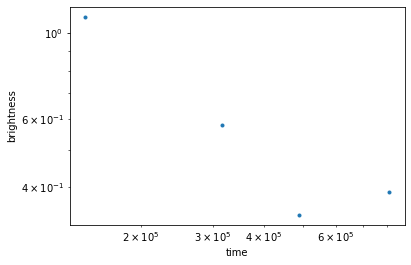

In [35]:
nuR_lo = 10**8
nuR_hi = 10**11
nuR = nu[(nu > nuR_lo) & (nu < nuR_hi)]
tR = t[(nu > nuR_lo) & (nu < nuR_hi)]
fnuR = fnu[(nu > nuR_lo) & (nu < nuR_hi)]
FerrR = Ferr[(nu > nuR_lo) & (nu < nuR_hi)]

plt.loglog(tR, fnuR, ls = "",marker = ".")
plt.xlabel("time")
plt.ylabel("brightness")

Text(0, 0.5, 'brightness')

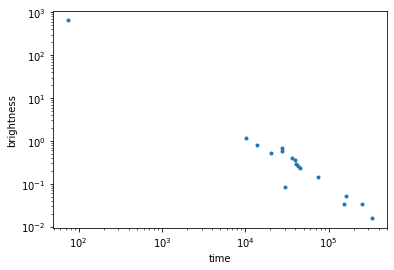

In [37]:
nuO_lo = 10**13
nuO_hi = 10**15
nuO = nu[(nu > nuO_lo) & (nu < nuO_hi)]
tO = t[(nu > nuO_lo) & (nu < nuO_hi)]
fnuO = fnu[(nu > nuO_lo) & (nu < nuO_hi)]
FerrO = Ferr[(nu > nuO_lo) & (nu < nuO_hi)]

plt.loglog(tO, fnuO, ls = "",marker = ".")
plt.xlabel("time")
plt.ylabel("brightness")

In [ ]:
#nuX_lo = 10**16
#nuX_hi = 10**20
#nuO_lo = 10**13
#nuO_hi = 10**15
#nuR_lo = 10**8
#nuR_hi = 10**11
#nuR = nu[(nu > nuR_lo) & (nu < nuR_hi)]
#tR = t[(nu > nuR_lo) & (nu < nuR_hi)]
#fnuR = fnu[(nu > nuR_lo) & (nu < nuR_hi)]
#FerrR = Ferr[(nu > nuR_lo) & (nu < nuR_hi)]
#plt.loglog(tR, fnuR, ls = "",marker = ".")
#plt.xlabel("time")
#plt.ylabel("brightness")


Text(0, 0.5, 'brightness')

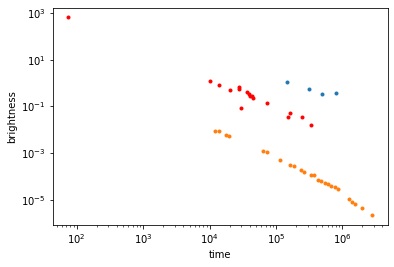

In [43]:
plt.loglog(tR, fnuR, ls = "",marker = ".")
plt.loglog(tX, fnuX, ls = "",marker = ".")
plt.loglog(tO, fnuO, ls = "",marker = ".",c="red")
plt.xlabel("time")
plt.ylabel("brightness")

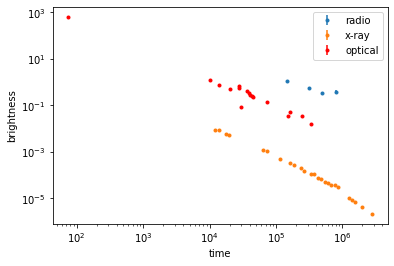

In [50]:
plt.errorbar(tR, fnuR, FerrR, ls = "",marker = "." , label= "radio")
plt.errorbar(tX, fnuX, FerrX, ls = "",marker = ".",label ="x-ray")
plt.errorbar(tO, fnuO, FerrO, ls = "",marker = ".",c="red", label = "optical")
plt.xlabel("time")
plt.ylabel("brightness")
plt.xscale("log")
plt.yscale("log")
plt.legend()